In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/wbtc_wpls.pkl"))

In [2]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0x46E27Ea3A035FfC9e6d6D56702CE3D208FF1e58c,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17247398,0x4dac0e16a927ae1508fdf80c886dc10401aeb272e67e...,3,0x379ed483117b6c5916ee1bcec49650aac94fc735e7b2...,45,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
1,0x46E27Ea3A035FfC9e6d6D56702CE3D208FF1e58c,Swap,[0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...,0x00000000000000000000000000000000000000000000...,17247398,0x4dac0e16a927ae1508fdf80c886dc10401aeb272e67e...,3,0x379ed483117b6c5916ee1bcec49650aac94fc735e7b2...,46,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
2,0x46E27Ea3A035FfC9e6d6D56702CE3D208FF1e58c,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17247398,0x4dac0e16a927ae1508fdf80c886dc10401aeb272e67e...,3,0x379ed483117b6c5916ee1bcec49650aac94fc735e7b2...,51,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
3,0x46E27Ea3A035FfC9e6d6D56702CE3D208FF1e58c,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17247398,0x4dac0e16a927ae1508fdf80c886dc10401aeb272e67e...,3,0x379ed483117b6c5916ee1bcec49650aac94fc735e7b2...,52,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
4,0x46E27Ea3A035FfC9e6d6D56702CE3D208FF1e58c,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17247398,0x4dac0e16a927ae1508fdf80c886dc10401aeb272e67e...,3,0x379ed483117b6c5916ee1bcec49650aac94fc735e7b2...,53,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8


<Axes: ylabel='event_name'>

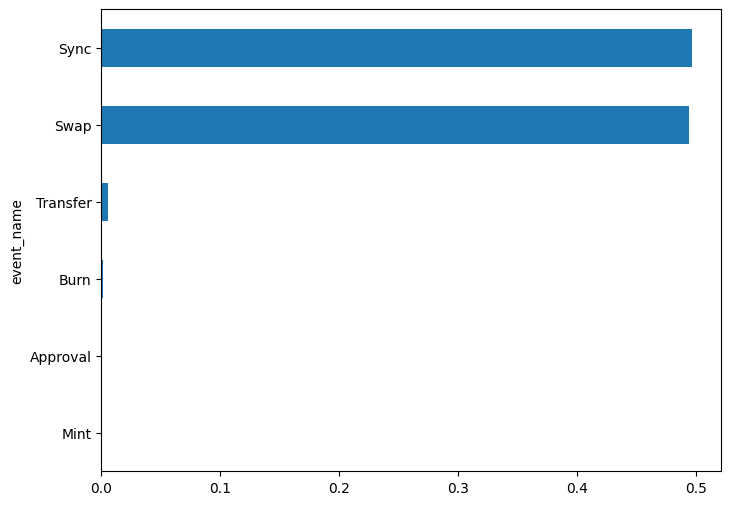

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

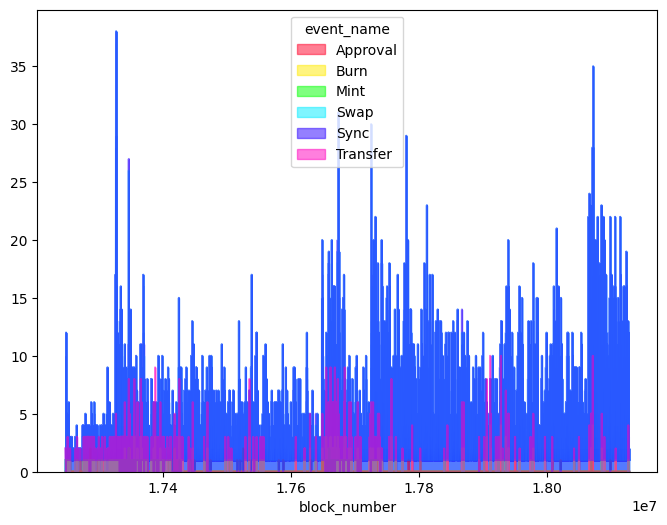

In [4]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [5]:
areaplot


event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17247398,0.0,0.0,1.0,1.0,2.0,2.0
17247703,0.0,0.0,0.0,0.0,0.0,1.0
17248206,0.0,0.0,0.0,1.0,1.0,0.0
17248209,0.0,0.0,0.0,12.0,12.0,0.0
17248216,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...
18128382,0.0,0.0,0.0,1.0,1.0,0.0
18128397,0.0,0.0,0.0,1.0,1.0,0.0
18128430,0.0,0.0,0.0,1.0,1.0,0.0
